Source: https://www.ig.com/uk/trading-strategies/macd-trading-strategy-190610

In [37]:
import pandas_datareader as pdr
import datetime
from matplotlib import pyplot as plt
import numpy as np

In [38]:
#define backtest range
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2015, 1, 1)
YEARS = (END - START).days / 365.25

print(YEARS)

9.998631074606434


In [39]:
#define starting variables
STARTING_BALANCE = 10000

In [40]:
#download data
price = pdr.get_data_yahoo('^GSPC', START, END)

In [41]:
#remove columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], 1)

price.tail()

,Open,Close
Date,,
2014-12-24,2083.250000,2081.879883
2014-12-26,2084.300049,2088.770020
2014-12-29,2087.629883,2090.570068
2014-12-30,2088.489990,2080.350098
2014-12-31,2082.110107,2058.899902


In [42]:
#calculate benchmark return and balance
price['Return'] = price.Close / price.Open
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729


In [43]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)

In [44]:
#calculate MACD
exp1 = price.Close.ewm(span = 12, adjust=False).mean()
exp2 = price.Close.ewm(span = 26, adjust=False).mean()

macd = exp1 - exp2
signal = macd.ewm(span = 9, adjust=False).mean()

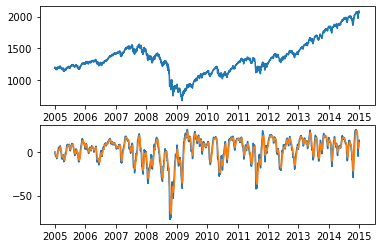

In [45]:
plt.figure()

#create subplot for price data
plt.subplot(211)
plt.plot(price.Close)

#create subplot for MACD
plt.subplot(212)
plt.plot(macd)
plt.plot(signal)

#show plot
plt.show()

In [46]:
#add column for entries
price['Long'] = macd > signal

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long
Date,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,-12.129293,True
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,True
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,True
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,-72.087728,True
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,-277.465944,True


In [47]:
#calculate system return and balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,-12.129293,True,0.999342,14164.774210
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,True,1.002145,14195.151854
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,True,1.001408,14215.144086
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,-72.087728,True,0.996102,14159.740543
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,-277.465944,True,0.988853,14001.895633


In [48]:
#calculate system drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((price.Sys_DD / price.Sys_Peak).min() * 100, 2)

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal,Sys_Peak,Sys_DD
Date,,,,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,-12.129293,True,0.999342,14164.774210,14304.327418,-139.553208
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,True,1.002145,14195.151854,14304.327418,-109.175564
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,True,1.001408,14215.144086,14304.327418,-89.183332
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,-72.087728,True,0.996102,14159.740543,14304.327418,-144.586876
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,-277.465944,True,0.988853,14001.895633,14304.327418,-302.431785


In [49]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_ret = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_ret}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')

Benchmark Total return: 83.68%
Benchmark CAGR: 6.27
Benchmark DD: -52.29%

System Total return: 40.02%
System CAGR: 3.42
System DD: -21.57%


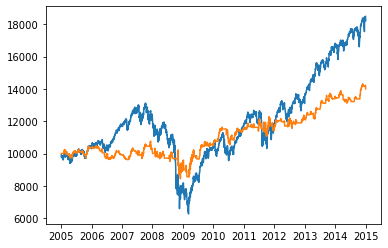

In [52]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal)

plt.show()